<a href="https://colab.research.google.com/github/brenocavi/churn_telecom/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

[*Churn*](https://webengage.com/blog/5-effective-proven-strategies-to-reduce-your-customer-churn-rate/) pode ser classificado como uma metrica de avaliação, que irá, mais especificamente, demonstrar potenciais clientes a desistirem do um determinado porduto.

Para modelos de negócio baseados na recorência, ou seja, serviços de assinaturas essa métrica torna-se extrema importante, pois, é mais barato manter os clientes que a empresa já possui, do que tentar consquistar novos clientes.

Com estudo do comportamento dos clientes, a empresa pode tentar prever clientes préd-dispostos a cancelar o serviço, e com isso, criar algum desconto ou condição especial, a dim de que, o cliente continue com a empresa. 


<p align=center>
<img src="https://content.webengage.com/wp-content/uploads/sites/4/2021/08/Reduce-churn-Rate-01.jpg" width="60%"></p>



## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

**Dicionario de variáveis**

**CustomerID:** Identificação individual dos consumidores.

**Gender:** Gênero.

**Senior Citizen:** Indica se o consumidor tem idade superior a 65 anos.

**Partner:** Indica se o consumidor possui cônjunge.

**Dependents:** Indica se o consumidor possui dependentes.

**Tenure**: Estima a quanto tempo o consumidor é cliente da empresa.

**Phono Service:** Indica se o consumidor possui linha telefônica residêncial.

**Multiple Line:** Indica se o consumidor possui serviço de multiplas linhas 
telefonicas.

**Internet Service:** Indica se o consumidor possui serviço de provedor de internet.

**Online Security:** Indica se o consumidor possui serviço de segurança online. 

**Online Backup:** Indica se o consumidor possui serviço de backup online.

**Device Protection:** Indica se o consumidor possui algum serviço adicional de proteção para o equipamento de internet. 

**Tech Support:** Indica se o consumidor possui algum serviço adicional para suporte técnico. 

**Streaming TV:** Indica se o consumidor possui assinatura para transmissão de pacote de televisão disponibilizado por terceiros , utilizndo serviço de internet.

**Streaming Movie:** Indica se o consumidor utiliza serviço de internet para streaming de filmes disponibilizados por terceiros.

**Contract:** Modelo de contratação do serviço, referente a período (mensal-anual-bienal)

**Paperless Billing:** Indica se o consumidor deseja receber fatura de forma impressa ou não.

**Payment Method:** Indica o método de pagamento escolhido pelo cliente.

**Monthly Charge:** Indica o custo mensal do cliente por todos os serviços contratados. 

**Total Charges:** Indica o total pago pelo cliente, calculado em trimestres.

**Churn:** Varíavel algo, se o cliente deixará ou não a empresa. 1 = SIM e 0 = NÂO

In [ ]:
!pip install scikit-plot -q

In [ ]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.metrics import auc
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scikitplot.metrics import plot_confusion_matrix, plot_roc

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Analise Exploratória 

Incialmente é preciso entender dos dados do Dataset. Essas primeras celulas, apresenta a quantidade de varíaveis sento 7043 no total e 21 colunas. Aparentemente o Dataset é composto por  string(texto), e valores númericos inteiros e com decimais, sem nenhum valor ausente.

Existem colunas que possuem mais de duas respotas, onde a primeiro momento, esperava-se apoenas resposta de Sim ou Não. Ou seja, essas colunas querem uma análise para averiguar se a necessidade destas três resposta. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Ao olhar para distribuição estatísticas dados númericos, observa-se que dados não possuem outliers. 

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Um ponto de atenção. A coluna *Total Charges* foi preenchida com valores númericos, como é posível ver na tabela a seguir, porém, olhando na quadro descritivo adquirido através do método info(), vemos que os dados classe do tipo objeto. Para evitar algum erro, e vermos se realmente não existe nenhum valor ausente, é necessário alterar os dados para valores númericos. 


In [ ]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Ao tentar converter os valores da coluna para float, foi retornado um erro indicando que aparentemente existe espaço vazio em algumas colunas, no campo de resposta. Ao aplicar um filtro nos dados, foram retornadas 11 colunas, e por representar uma porporção pequena, apenas 0,16% dos dados totais, eu optei por excluir essas colunas.

In [ ]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
print('As 11 colunas representam', (len(df.loc[df['TotalCharges'] == ' ']) / df.shape[0])*100, 
      '% do total dos dados')

As 11 colunas representam 0.1561834445548772 % do total dos dados


In [ ]:
nulos = df.loc[df['TotalCharges'] == ' '].index

In [ ]:
df_clean = df.copy()


df_clean.drop(index= nulos, inplace = True)
df_clean.shape

(7032, 21)

In [ ]:
df_clean['TotalCharges']= df_clean["TotalCharges"].apply(lambda x: float(x))

Após estes passos, a coluna possui o tipo correto para os dados que estão dispostos, e temos a certeza de que não existem valores ausentes. 


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Próximo passo, é seguir para colunas preenchidas com strings. A colunas que possuem três respostas, seriam na opnião do autor desse trabalho, denecessário serem mantidas desta forma. Por exemplo, na coluna *Mulpleslines* a resposta NO phone service está relacionada a uma pergunta anterior, se o cliente possuim serviço de telefone, e casi se a resposta for não para uma unica linha, pode-se subentender que o cliente também não possui multiplas linhas. 

Desta forma, a fim de reduzir a quantidade infomação a ser processa pelo modelo e que não irá adicionar nenhuma informação relevante, foi agrupado estas resposta à resposta NO. Assim temos apenas duas opções YEs e NO.

A coluna de *costumerID* foi retirada do Dataset, uma vez que não adiciona nenhuma informação relevante para o alvo da análise. 

In [ ]:
df_clean.drop( 'customerID', axis=1, inplace=True)

In [ ]:
categories = df_clean.select_dtypes(include=['object']).keys().to_list()


for category in categories: 
  print('A coluna {} tem as seguintes respostas:'.format(category), df[category].unique())


A coluna gender tem as seguintes respostas: ['Female' 'Male']
A coluna Partner tem as seguintes respostas: ['Yes' 'No']
A coluna Dependents tem as seguintes respostas: ['No' 'Yes']
A coluna PhoneService tem as seguintes respostas: ['No' 'Yes']
A coluna MultipleLines tem as seguintes respostas: ['No phone service' 'No' 'Yes']
A coluna InternetService tem as seguintes respostas: ['DSL' 'Fiber optic' 'No']
A coluna OnlineSecurity tem as seguintes respostas: ['No' 'Yes' 'No internet service']
A coluna OnlineBackup tem as seguintes respostas: ['Yes' 'No' 'No internet service']
A coluna DeviceProtection tem as seguintes respostas: ['No' 'Yes' 'No internet service']
A coluna TechSupport tem as seguintes respostas: ['No' 'Yes' 'No internet service']
A coluna StreamingTV tem as seguintes respostas: ['No' 'Yes' 'No internet service']
A coluna StreamingMovies tem as seguintes respostas: ['No' 'Yes' 'No internet service']
A coluna Contract tem as seguintes respostas: ['Month-to-month' 'One year' '

In [ ]:
three_ans = df_clean.nunique()[df_clean.nunique() == 3].keys().to_list()

for answer in three_ans:
  df_clean[answer].replace('No internet service', 'No', inplace = True)
  df_clean[answer].replace('No phone service', 'No', inplace = True)

In [ ]:
three_ans

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

In [ ]:
three_ans = df_clean.nunique()[df_clean.nunique() == 3].keys().to_list()

df_clean['OnlineSecurity'].replace('No internet service', 'No', inplace = True)
df_clean['OnlineBackup'].replace('No internet service', 'No', inplace = True)
df_clean['DeviceProtection'].replace('No internet service', 'No', inplace = True)
df_clean['TechSupport'].replace('No internet service', 'No', inplace = True)
df_clean['StreamingTV'].replace('No internet service', 'No', inplace = True)
df_clean['StreamingMovies'].replace('No internet service', 'No', inplace = True)

In [ ]:
for category in categories: 
  print('A coluna {} tem as seguintes respostas:'.format(category), df_clean[category].unique())

A coluna gender tem as seguintes respostas: ['Female' 'Male']
A coluna Partner tem as seguintes respostas: ['Yes' 'No']
A coluna Dependents tem as seguintes respostas: ['No' 'Yes']
A coluna PhoneService tem as seguintes respostas: ['No' 'Yes']
A coluna MultipleLines tem as seguintes respostas: ['No' 'Yes']
A coluna InternetService tem as seguintes respostas: ['DSL' 'Fiber optic' 'No']
A coluna OnlineSecurity tem as seguintes respostas: ['No' 'Yes']
A coluna OnlineBackup tem as seguintes respostas: ['Yes' 'No']
A coluna DeviceProtection tem as seguintes respostas: ['No' 'Yes']
A coluna TechSupport tem as seguintes respostas: ['No' 'Yes']
A coluna StreamingTV tem as seguintes respostas: ['No' 'Yes']
A coluna StreamingMovies tem as seguintes respostas: ['No' 'Yes']
A coluna Contract tem as seguintes respostas: ['Month-to-month' 'One year' 'Two year']
A coluna PaperlessBilling tem as seguintes respostas: ['Yes' 'No']
A coluna PaymentMethod tem as seguintes respostas: ['Electronic check' 'M

Os gráficos a seguuir dos dão uma ideia de como os estão distribuidos os dados categoricos. Não são todas as colunas que apresentam grande diferença entre as categorias de cada valor categorico, por exemplo, os dados são praticamente 50/50 entre homem e mulher. As principais diferenças se dão nas Features Dependents, PhoneService, OnlineSecurity, Contract, PaymentMethod. 


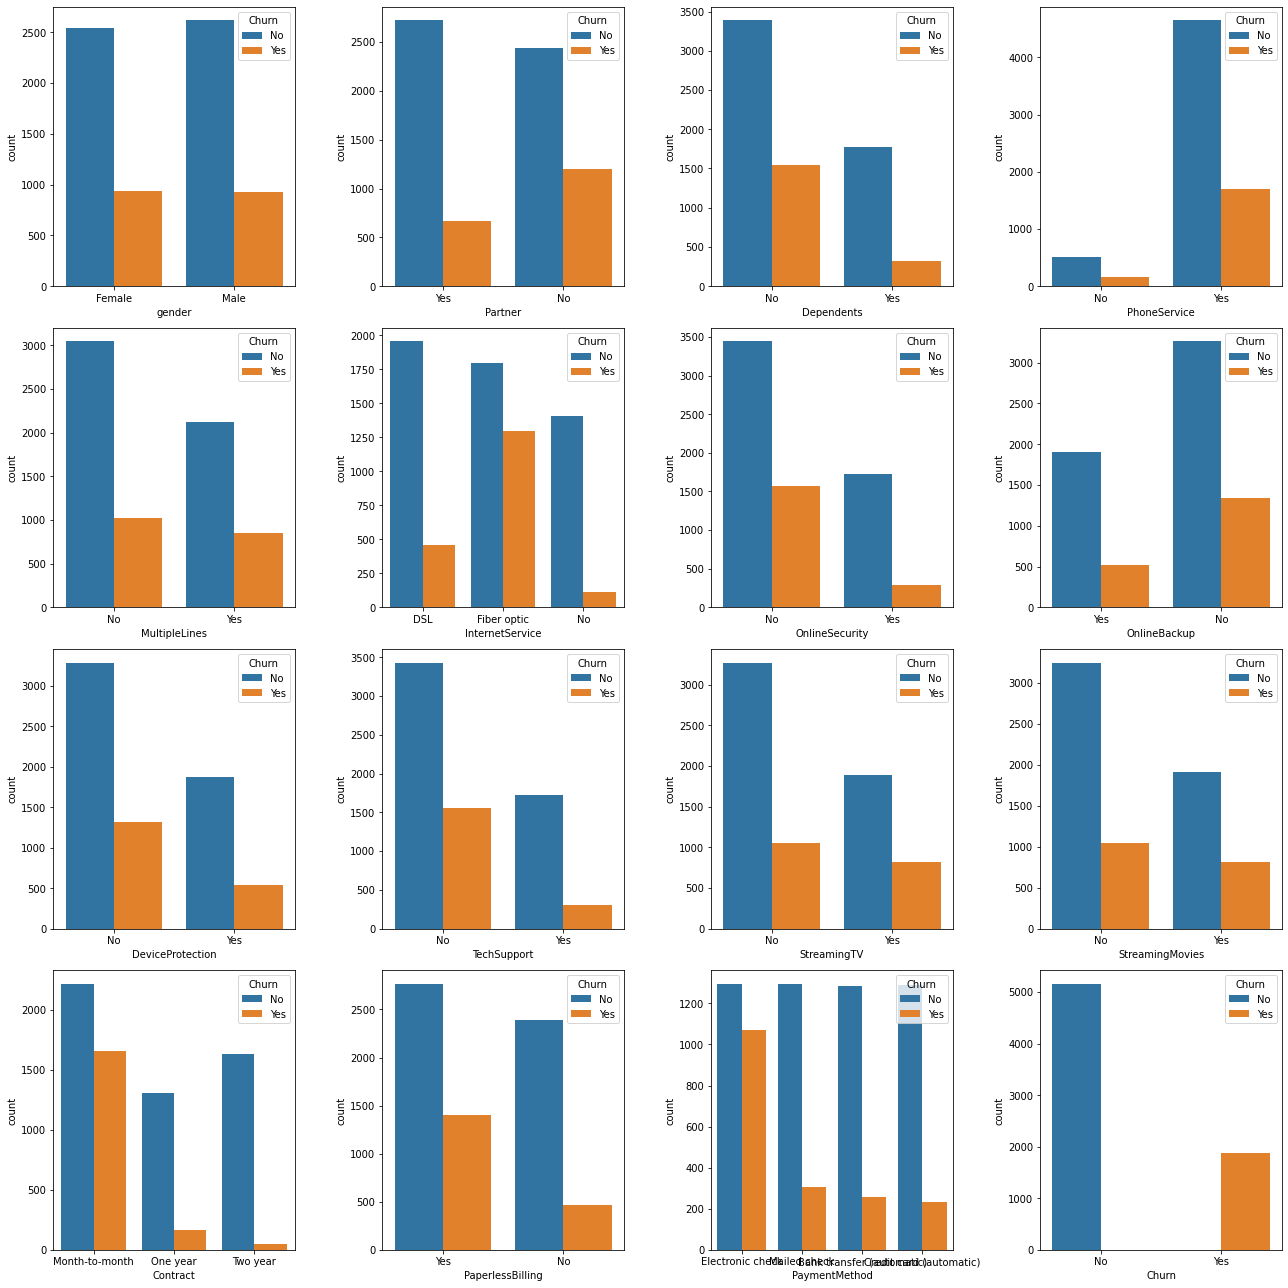

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols=4, figsize=(18,18))

idx =0
for category in categories:
  idx += 1
  plt.subplot(4 ,4 , idx)
  sns.countplot(x= category, hue='Churn', data = df_clean)

plt.tight_layout()

Após olhar as distribuições das variáveis, fiz agrupamento do que poderia ser pacotes de serviços desponibilizados pela empresa. Ao realizar esse processo, é possível ver que os cliente que possuem de 1 a 4 serviços adicionais, são os clientes que apresentam maior taxa de churn. Essa coluna, inicialmente foi criada como valor númerico e para ser utilizada no modelo, a coluna foi transformada em string. 

In [ ]:
df_clean['All_services'] = (df_clean[['PhoneService','MultipleLines','InternetService',
                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                      'TechSupport','StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

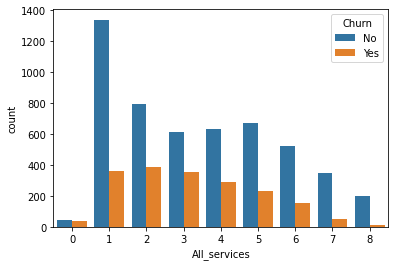

In [ ]:
sns.countplot(x= 'All_services', hue='Churn', data = df_clean)

In [ ]:
df_clean['All_services']= df_clean["All_services"].apply(lambda x: str(x))

Nessa etapa se faz necessário alterar os valores categoricos, para que possamos utilizar os dados em modelos, já que um modelo não consegue trabalhar com dados de texto. Para isso foram utilizados dois métodos diferentes, a fim de evitar um aumento desnecessários no número de features e por conseguinte, na complexidade dos dados.

Para os dados que possuem dois valores de resposta, foi o utilizado o método **label encoder**, classificando os dados entre 0 e 1. Já para os dados que possuem mais valores, foi utilizado o método **get dummy**, nesse processo é feita de a separação dos valores em novas colunas recebendo o valor 1 apenas que a linha que corresponda ao valor da coluna. 

Para essa etapa, criei uma cópia do Dataset. Após realizar os processos de encoder, as colunas referentes ao pacote com 1, 6, 7 e 8 serviços foram retiradas, por serem menos relevantes. 

In [ ]:
df_t= df_clean.copy()

In [ ]:
le= LabelEncoder()

#seprar as varíaveis com duas respostas
var_categ = df_clean.nunique()[df_clean.nunique() == 2].keys().to_list()

#transformando em 1 e 0
for var in var_categ:
    df_t[var] = le.fit_transform(df_t[var])

In [ ]:
#selecionando as variaveis string
teste = df_clean.select_dtypes(include=['object']).keys().to_list()

#aplicar método dummies nas varíaveis não binárias
dummies = []

for i in teste:
  if i not in var_categ:
    dummies.append(i)

#transformando as colunas 
df_t = pd.get_dummies(df_t, columns= dummies)

In [ ]:
df_t.drop( ['All_services_0', 'All_services_6', 'All_services_7', 'All_services_8']
          , axis=1, inplace=True)

In [ ]:
df_t

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,All_services_1,All_services_2,All_services_3,All_services_4,All_services_5
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
corr = df_t.corr()


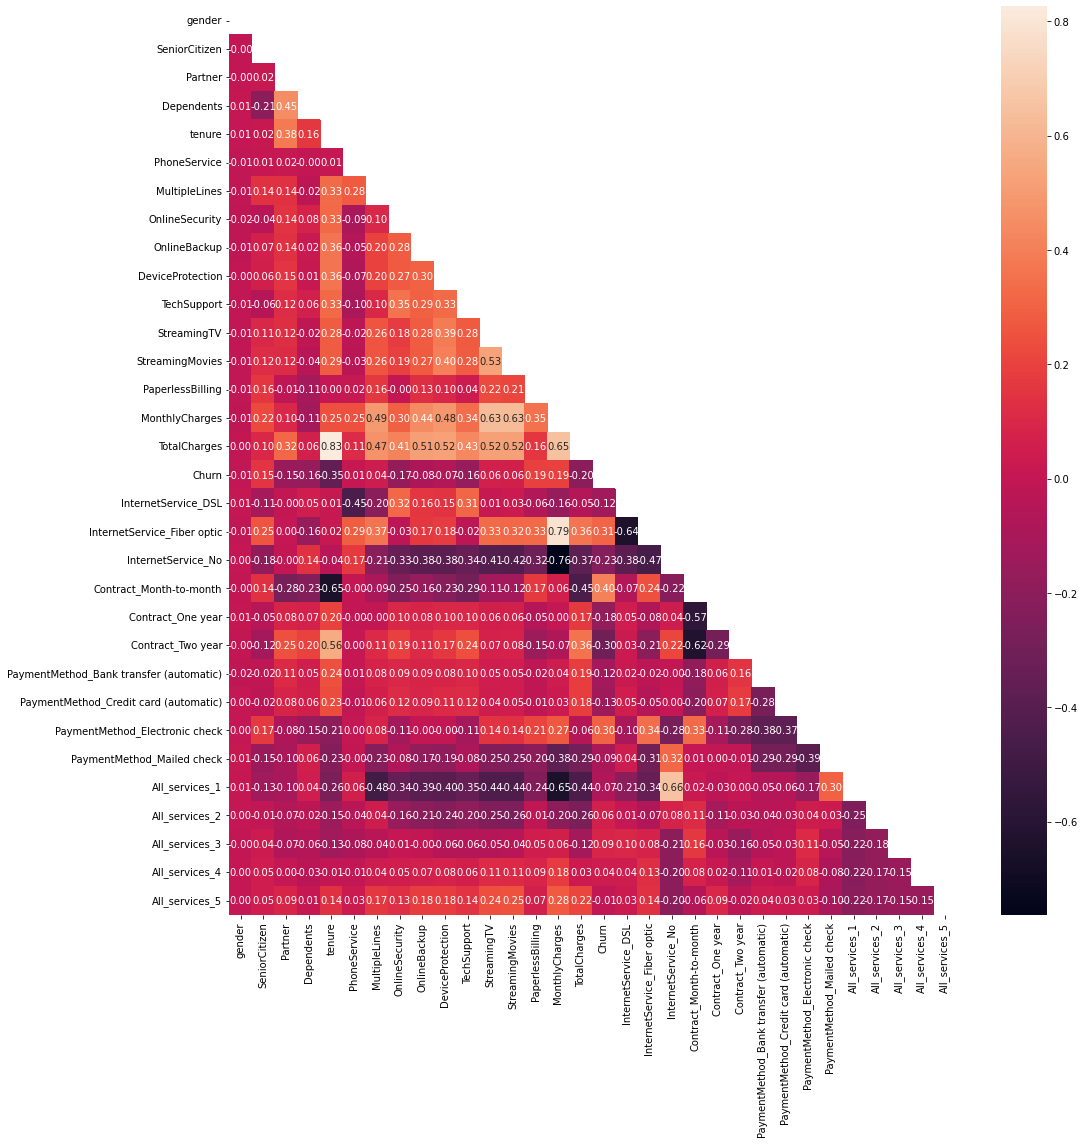

In [ ]:


fig, ax = plt.subplots(figsize=(16,16))

mask = np.triu(corr)
sns.heatmap(corr, annot=True, fmt = '.2f', mask=mask, ax=ax)

plt.tight_layout()

##Modelo

Com os dados preparados, passamos para o treino do modelo. Como nesse caso será aplicado o tunning nos hyperparametros, a fim de melhorar o desempenho do modelo, é necessário que tenhamos um valor de referência (baseline) para que possamos comparar o valor e precisar se temos melhora, no desempenho, ou não. 

O baseline foi calcula utilizando os dados sem padronização e sem balaceamento, com modelo Logistic Regression. Foi utilizada apenas o **recall** como métrica de avaliação, essa métrica foi escolha, pois o problema que o modélo irá tratar é sobre cliente continuar ou não com a empresa. Ou seja, para empresa é interessante dectar falsos positivos, clientes que o modelo diz que iram continuar mas não irão na verdade.

 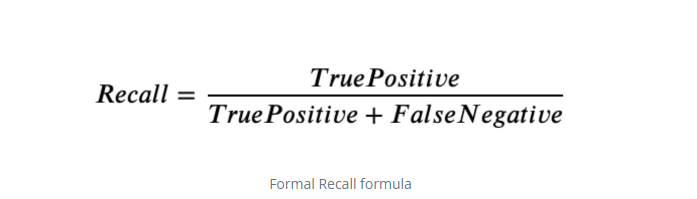

In [ ]:
X = df_t.drop('Churn', axis=1)
y = df_t['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
#baseline
pipe = make_pipeline( StandardScaler(), LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, scoring='recall')
scores.mean()

0.5542170818505339

Conhecendo o nosso baseline, é aplicado nos dados o processo de padronização e balanceamento. Ao averiguar alguns trabalhos científicos realizando o para o problema em questão, foi possível observar que os modelos de arvores de decisão são mais utilziados nessa situação e possuem melhor desemprenho. Desta forma optei por utilizar os modelos Random Forest, XGBoost, Decision Tree e Logistic Regression para analisar o **recall** com os dados padronizados e balanceados. 

In [ ]:
#Padronização 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#Balanceamento 
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train ,y_train)

In [ ]:
# iniciando os modelos
lg= LogisticRegression()
dt= DecisionTreeClassifier()
xgb= XGBClassifier()
rfc= RandomForestClassifier()

In [ ]:
for model in (lg, dt, rfc, xgb):
  pipe = make_pipeline( model)
  scores = cross_val_score(pipe, X_res, y_res, scoring = 'recall')
  print('A acuracia do modelo {}:'.format(model.__class__.__name__), scores.mean())

A acuracia do modelo LogisticRegression: 0.8086154872051345
A acuracia do modelo DecisionTreeClassifier: 0.7871431191131115
A acuracia do modelo RandomForestClassifier: 0.8597015920646827
A acuracia do modelo XGBClassifier: 0.8442037175960657


Com o resultado acima é nitido a melhor no desemprenho do modelo de Logistic Regression, porém, o modelo que obteve melhor desempenho e será o utilizado é o Random Forest

##Otimização dos Hiperparâmetros

A finalidade desta etapa é ajustar os parâmetros que o modelo possui. Na pagina oficial do sckit learning é possivel observar que existem diversos hiperparâmetros para serem testados, porém, alterar todos esses hiperparâmetros tornar mais "trabalhoso" aplicação do modelo, isso deve ser levado em consideração. Ao analisar trabalho de outras pessoas, os hiperparâmetros que seriam mais importantes são:

**n_estimators:** O número de árvores utilizadas

**max_depth:** A profundidade máxima de cada árvore

**min_samples_leaf:** O número mínimo de amostras necessárias para estar em um nó folha. 

**max_features:** O número de features a serem considerados ao procurar a melhor divisão

Para achar o melhor valor para cada hiperparâmetro, foi utilizado o método GridSearch. O método testa os valores dos hiperparâmetros definidos por quem está treiandno o modelo, definindos no param_grid, e enconttra o melhor parâmetro possível para os dados. Desta forma, não necessário tentar utilizar todos os parâmetro possíveis do mundo.

In [ ]:
param_grid ={
  'n_estimators':range(1,1000,50),
}


kfold= StratifiedKFold(n_splits= 10, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring='recall', cv= kfold,  
                           error_score= 'raise')
grid_result= grid_search.fit(X_res, y_res)

print('Melhor pontuação {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor pontuação 0.8731918804443379 para {'n_estimators': 601}


In [ ]:
rfc=RandomForestClassifier(n_estimators= 601)

param_grid ={
  'max_depth':range(2,40, 1),
}


kfold= StratifiedKFold(n_splits= 10, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv= kfold)
grid_result= grid_search.fit(X_res, y_res)

print('Melhor pontuação {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor pontuação 0.8636372426439942 para {'max_depth': 34}


In [ ]:
rfc=RandomForestClassifier(n_estimators= 601, max_depth= 34)

param_grid ={
  'min_samples_leaf':range(1,28, 1),
}


kfold= StratifiedKFold(n_splits= 10, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv= kfold)
grid_result= grid_search.fit(X_res, y_res)

print('Melhor pontuação {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor pontuação 0.8596324081020257 para {'min_samples_leaf': 1}


In [ ]:
rfc=RandomForestClassifier(n_estimators= 601, min_samples_leaf =  1,
                           max_depth=34)

param_grid ={
  'max_features': ['sqrt', 'log2', None],
}


kfold= StratifiedKFold(n_splits= 10, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv= kfold)
grid_result= grid_search.fit(X_res, y_res)

print('Melhor pontuação {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor pontuação 0.8614388597149288 para {'max_features': 'log2'}


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1291
           1       0.51      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.75      0.76      1758

Acurácia: 0.7457

AUC: 0.7551248389028309



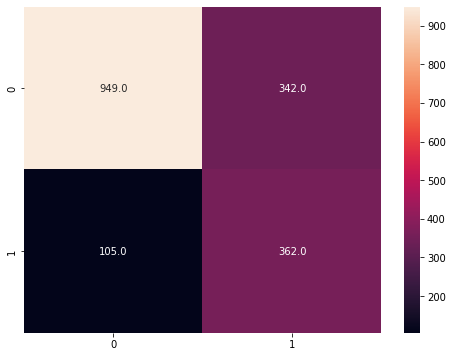

In [ ]:
#Modelo final 
rfc=RandomForestClassifier(n_estimators= 601,
                           max_depth = 34, 
                           min_samples_leaf = 1, 
                           max_features = 'log2')

rfc.fit(X_res, y_res)

#previsão 
scaler_p = StandardScaler().fit(X_test)
X_test = scaler_p.transform(X_test)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

#matriz de confusão
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
print('AUC: {}\n'.format(roc_auc_score(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', ax=ax)

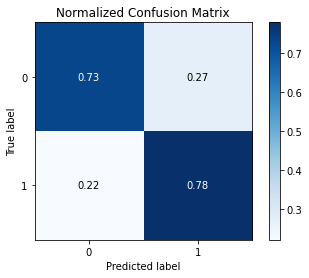

In [ ]:
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


##Conclusão 

Após análise dos dados do Dataset, vimos que existem algumas possibilidades de combinação entre as *features*,já existentes, que podem trazer um ganho de informação para problema. Isso demonstra a importância de realizar a análise exploratória com atenção, além de ser importante conhecer bem o problema que está tentando resolver.

Quanto ao modelo, este quando aplicado nos dados separados para validação, teve um desempenho um pouco abaixo, comparado com os dados de treino. Um desemprenho um pouco abaixo, é resultado esperado, contudo, é possível melhorar o desempenho desse modelo, ao realizar testes com outros hiperparâmetros.

